# Intensive Care in Germany

## Data Source

[DIVI-Intensivregister](https://www.intensivregister.de/) monitors the ICU capacities of 1,300 hospitals in Germany.

## Setup

In [1]:
# standard library
import datetime
import math

In [2]:
# third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Date this Notebook was run

In [3]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2021-05-15'

In [4]:
# style like ggplot in R
plt.style.use('ggplot')

In [5]:
# Avoid cutting off part of the axis labels, see:
# https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
plt.rcParams.update({'figure.autolayout': True})

## Get Data

In [6]:
timeline_data = "https://diviexchange.blob.core.windows.net/%24web/bundesland-zeitreihe.csv"

In [7]:
timeline_df = pd.read_csv(timeline_data)

In [8]:
timeline_df.tail(3)

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
7171,2021-05-15T12:15:00+02:00,NORDRHEIN_WESTFALEN,320,921,4938,660,2360,497,249,88,77,132,23
7172,2021-05-15T12:15:00+02:00,BRANDENBURG,50,88,529,228,328,116,56,19,9,16,6
7173,2021-05-15T12:15:00+02:00,DEUTSCHLAND,1332,4084,20045,3391,10149,2797,1262,411,282,504,135


## Rename Columns

### Convert datatype of date column

In [9]:
timeline_df["Datum"] = timeline_df["Datum"].str[:10]
timeline_df.head()

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
0,2020-03-20,BAYERN,45,61,77,392,0,0,0,37,5,1,2
1,2020-03-20,RHEINLAND_PFALZ,15,14,48,112,0,0,0,10,3,2,0
2,2020-03-20,NIEDERSACHSEN,25,17,43,236,0,0,0,20,3,2,0
3,2020-03-20,SACHSEN,20,3,44,272,0,0,0,16,2,2,0
4,2020-03-20,HESSEN,19,7,18,185,0,0,0,16,3,0,0


In [10]:
timeline_df.iloc[ : , [0]] = timeline_df.iloc[ : , [0]].apply(pd.to_datetime)

In [11]:
timeline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7174 entries, 0 to 7173
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Datum                                       7174 non-null   datetime64[ns]
 1   Bundesland                                  7174 non-null   object        
 2   Anzahl_Meldebereiche_Erwachsene             7174 non-null   int64         
 3   Aktuelle_COVID_Faelle_Erwachsene_ITS        7174 non-null   int64         
 4   Belegte_Intensivbetten_Erwachsene           7174 non-null   int64         
 5   Freie_Intensivbetten_Erwachsene             7174 non-null   int64         
 6   7_Tage_Notfallreserve_Erwachsene            7174 non-null   int64         
 7   Freie_IV_Kapazitaeten_Gesamt                7174 non-null   int64         
 8   Freie_IV_Kapazitaeten_Davon_COVID           7174 non-null   int64         
 9   Betriebs

In [12]:
federal_level = timeline_df[timeline_df.Bundesland=='DEUTSCHLAND']
federal_level.tail()

,Datum,Bundesland,Anzahl_Meldebereiche_Erwachsene,Aktuelle_COVID_Faelle_Erwachsene_ITS,Belegte_Intensivbetten_Erwachsene,Freie_Intensivbetten_Erwachsene,7_Tage_Notfallreserve_Erwachsene,Freie_IV_Kapazitaeten_Gesamt,Freie_IV_Kapazitaeten_Davon_COVID,Betriebssituation_Regulaerer_Betrieb,Betriebssituation_Teilweise_Eingeschraenkt,Betriebssituation_Eingeschraenkt,Betriebssituation_Keine_Angabe
7105,2021-05-11,DEUTSCHLAND,1333,4449,20818,2815,10115,2496,1170,383,279,536,135
7122,2021-05-12,DEUTSCHLAND,1333,4361,20905,2771,10091,2485,1139,402,281,517,133
7139,2021-05-13,DEUTSCHLAND,1332,4244,20513,3080,10111,2615,1155,392,284,523,133
7156,2021-05-14,DEUTSCHLAND,1332,4172,20085,3441,10109,2850,1291,418,275,506,133
7173,2021-05-15,DEUTSCHLAND,1332,4084,20045,3391,10149,2797,1262,411,282,504,135


## Used Beds (Adults)

In [13]:
used_beds = federal_level.loc[ : , ['Datum', 'Belegte_Intensivbetten_Erwachsene']]
used_beds.columns = ['date', 'ICU beds in use (adults)']
used_beds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 16 to 7173
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      422 non-null    datetime64[ns]
 1   ICU beds in use (adults)  422 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.9 KB


In [14]:
used_beds.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

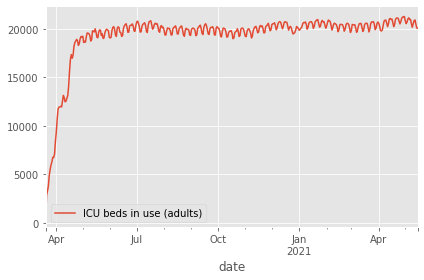

In [15]:
used_beds.plot()

## Covid-19 patients in ICU

In [16]:
icu = federal_level.loc[ : , ['Datum', 'Aktuelle_COVID_Faelle_Erwachsene_ITS']]

In [17]:
icu.columns = ['date', 'Covid-19 cases in ICU']
icu.set_index('date', inplace=True)
icu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 422 entries, 2020-03-20 to 2021-05-15
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Covid-19 cases in ICU  422 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB


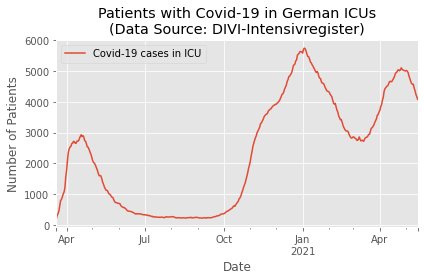

In [18]:
icu_cases = icu.plot(
    title='Patients with Covid-19 in German ICUs\n(Data Source: DIVI-Intensivregister)',
xlabel='Date',
ylabel='Number of Patients')

In [19]:
fig = icu_cases.get_figure()
fig.savefig('img/covid-19-patients-in-icu-germany.png')